In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/training.csv')
df.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044331,-0.385883,1,1,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84534 entries, 0 to 84533
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         84534 non-null  int64  
 1   Promotion  84534 non-null  object 
 2   purchase   84534 non-null  int64  
 3   V1         84534 non-null  int64  
 4   V2         84534 non-null  float64
 5   V3         84534 non-null  float64
 6   V4         84534 non-null  int64  
 7   V5         84534 non-null  int64  
 8   V6         84534 non-null  int64  
 9   V7         84534 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 6.4+ MB


In [3]:
df.describe()

,ID,purchase,V1,V2,V3,V4,V5,V6,V7
count,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000
mean,62970.972413,0.012303,1.500662,29.973600,0.000190,1.679608,2.327643,2.502898,1.701694
std,36418.440539,0.110234,0.868234,5.010626,1.000485,0.466630,0.841167,1.117349,0.457517
min,1.000000,0.000000,0.000000,7.104007,-1.684550,1.000000,1.000000,1.000000,1.000000
25%,31467.250000,0.000000,1.000000,26.591501,-0.905350,1.000000,2.000000,2.000000,1.000000
50%,62827.500000,0.000000,2.000000,29.979744,-0.039572,2.000000,2.000000,3.000000,2.000000
75%,94438.750000,0.000000,2.000000,33.344593,0.826206,2.000000,3.000000,4.000000,2.000000
max,126184.000000,1.000000,3.000000,50.375913,1.691984,2.000000,4.000000,4.000000,2.000000


In [5]:
df['purchase'].value_counts()

0    83494
1     1040
Name: purchase, dtype: int64

In [6]:
df['V1'].value_counts()

1    31631
2    31608
3    10670
0    10625
Name: V1, dtype: int64

In [7]:
df['V4'].value_counts()

2    57450
1    27084
Name: V4, dtype: int64

In [9]:
df['V5'].value_counts()

3    32743
2    31196
1    15412
4     5183
Name: V5, dtype: int64

In [10]:
df['V6'].value_counts()

3    21186
4    21176
2    21146
1    21026
Name: V6, dtype: int64

In [11]:
df['V7'].value_counts()

2    59317
1    25217
Name: V7, dtype: int64

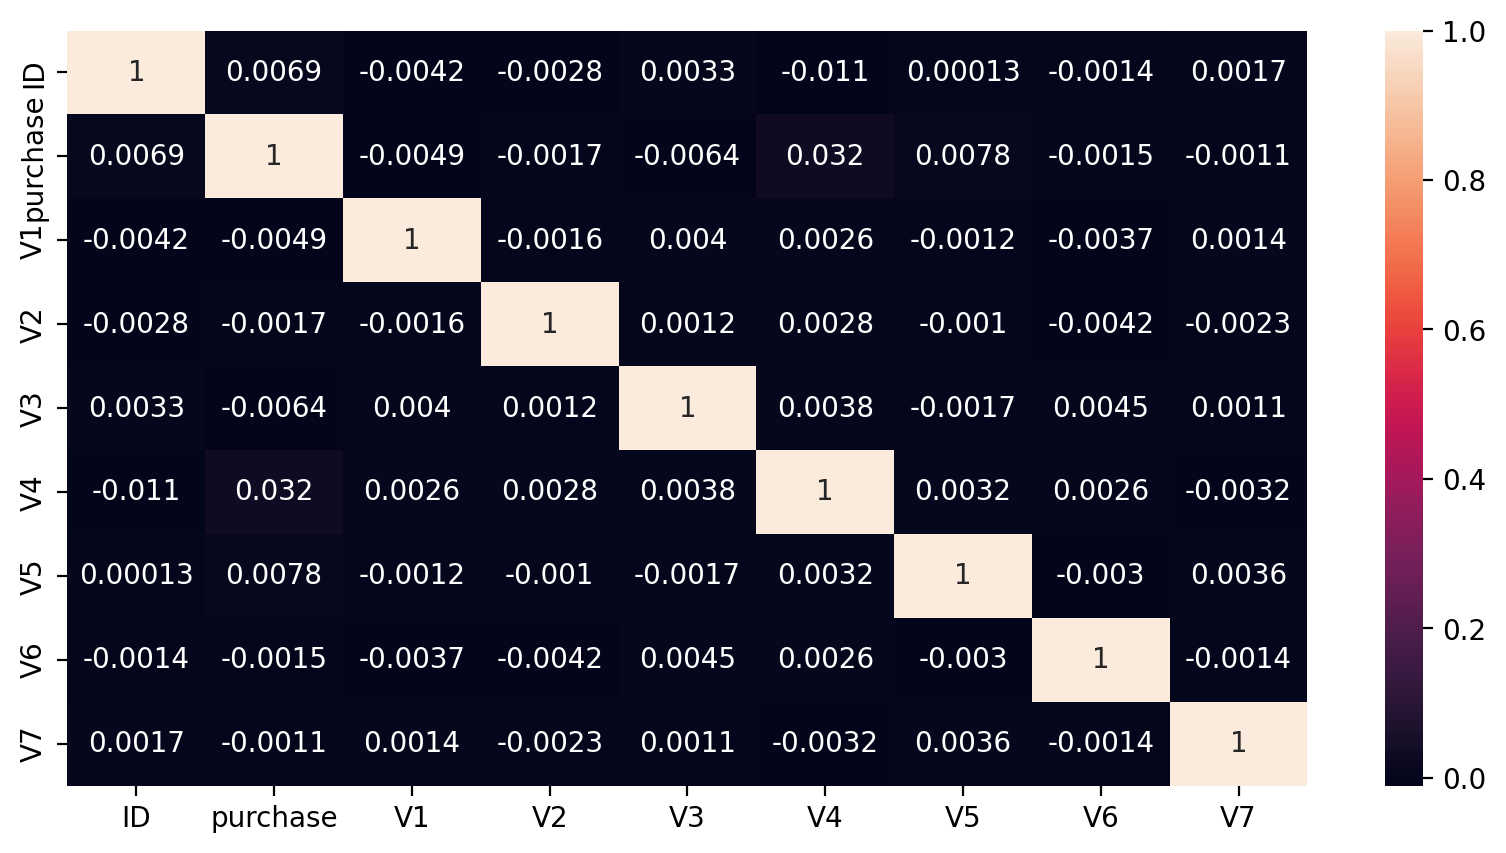

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=200)#, sharey=True)
ax = sns.heatmap(df.corr(), annot=True)

## Quantitative Data

### Not integer = V2, V3

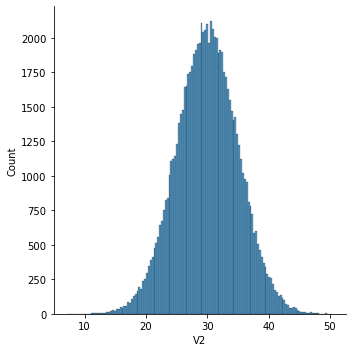

In [17]:
sns.displot(df['V2'])

Seems to be normal distributed

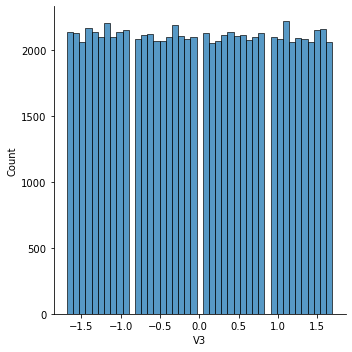

In [18]:
sns.displot(df['V3'])

Seems to be randomly distributed

### Integer = purchase, V1, V4, V5, V6

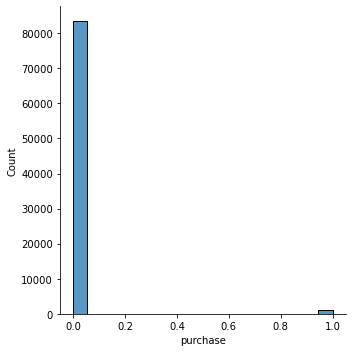

In [25]:
sns.displot(df['purchase'])

Seems to be boolean and highly unbalanced

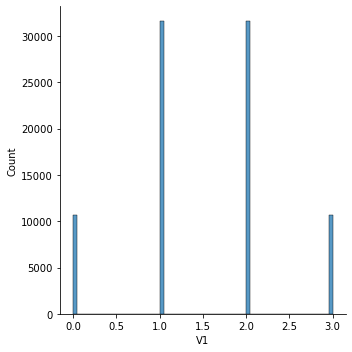

In [24]:
sns.displot(df['V1'])

Can be an integer quantitative feature or a numeric categorical one

#### V4 analysis

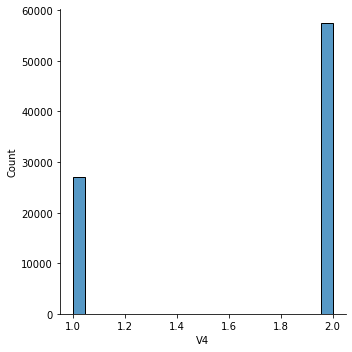

In [20]:
sns.displot(df['V4'])

Appears to be a numeric categorical feature

In [70]:
def analyse_vars(data, col_to_analyse, ref_col):
    unique_vals = data[col_to_analyse].unique()

    ref_val = data[ref_col].mean()

    values = {}
    for val in unique_vals:
        values[val] = data[ref_col][data[col_to_analyse]==val].mean()

    values[999] = ref_val  

    data_out = pd.DataFrame(data = values, index=['values']).T
    data_out['change'] = (data_out['values'] - ref_val)/ref_val

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,7), dpi=200)#, sharey=True)

    sns.barplot(x=data_out.index, y=data_out['values'],palette='viridis',ax=ax[0])
    sns.barplot(x=data_out.index, y=data_out['change'],palette='viridis', ax=ax[1])

    ax[0].bar_label(ax[0].containers[0])
    ax[1].bar_label(ax[1].containers[0])

    return data_out




,values,change
1,0.007126,-0.420781
2,0.014743,0.198371
999,0.012303,0.000000


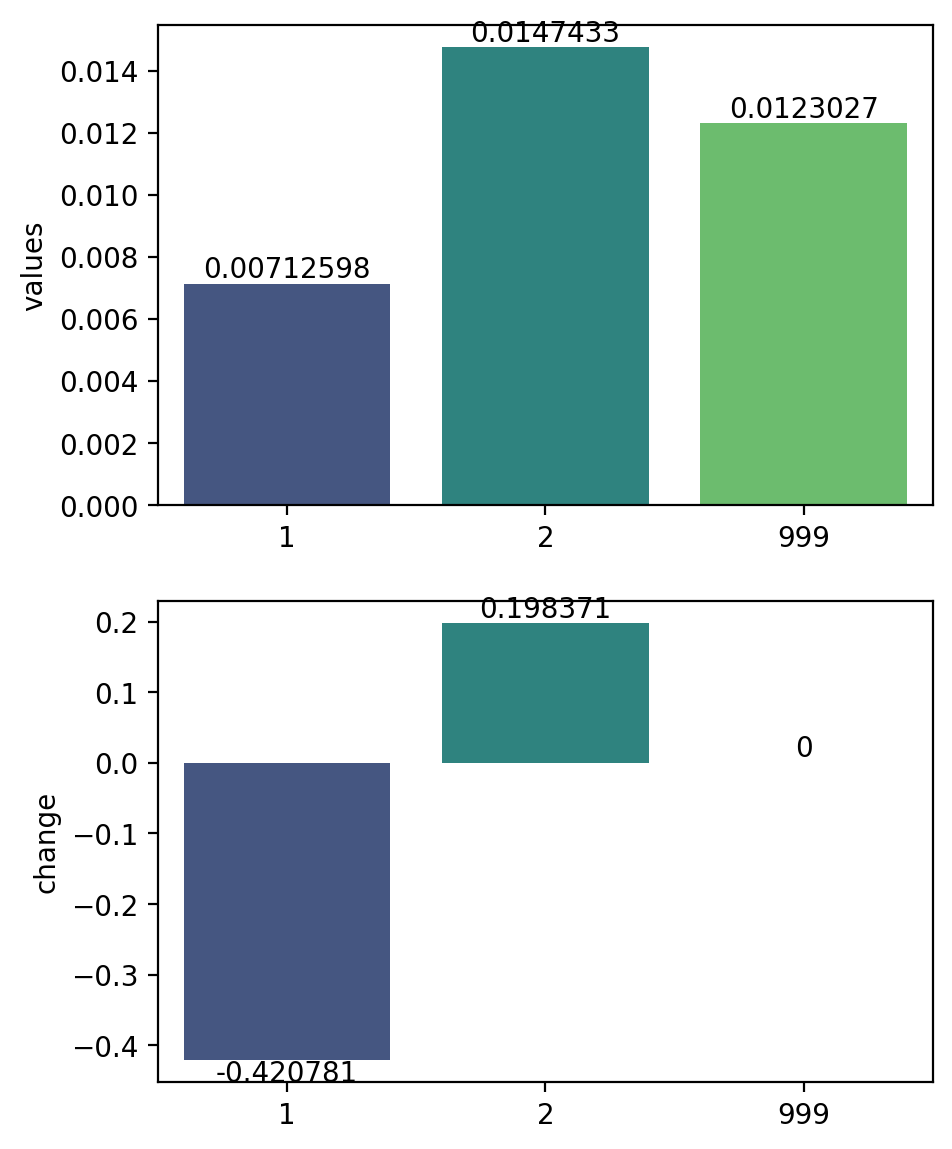

In [71]:
analyse_vars(df, 'V4', 'purchase')

In [33]:
data = df.copy()
col_to_analyse = 'purchase'
ref_col = 'V4'

<AxesSubplot:ylabel='values'>

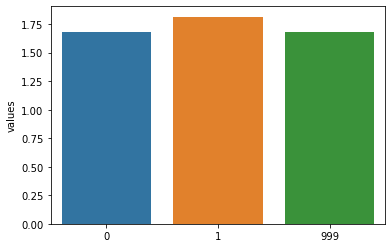

In [47]:
unique_vals = data[col_to_analyse].unique()

ref_val = data[ref_col].mean()

values = {}
for val in unique_vals:
    values[val] = data[ref_col][data[col_to_analyse]==val].mean()

values[999] = ref_val  

data_out = pd.DataFrame(data = values, index=['values']).T

sns.barplot(x=data_out.index, y=data_out['values'])

In [ ]:
values.

In [43]:
pd.DataFrame(data = values, index=['values']).T

,values
0,1.677929
1,1.814423
999,1.679608


In [49]:
analyse_vars(df, 'purchase', 'V4')

ValueError: Invalid RGBA argument: 'magma'

In [29]:
print(df['purchase'].mean())
print(df['purchase'][df['V4']==1].mean())
print(df['purchase'][df['V4']==2].mean())

0.012302742091939338
0.007125978437453847
0.01474325500435161


In [30]:
df['V4'].unique()

array([1, 2], dtype=int64)

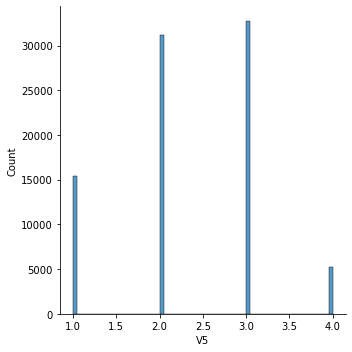

In [21]:
sns.displot(df['V5'])

Can be an integer quantitative feature or a numeric categorical one

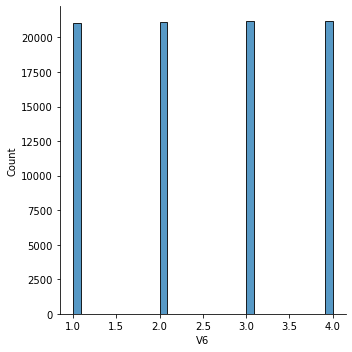

In [22]:
sns.displot(df['V6'])

It is very uniform distributed between the values. Can be an integer quantitative feature or a numeric categorical one

In [26]:
df['purchase'].mean()

0.012302742091939338

In [28]:
df['purchase'][df['V4']==2].mean()

0.01474325500435161